Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Pixel value range: 0 to 255

Working with 10000 samples.
Reshaped data: (10000, 784)
Data preprocessing completed.


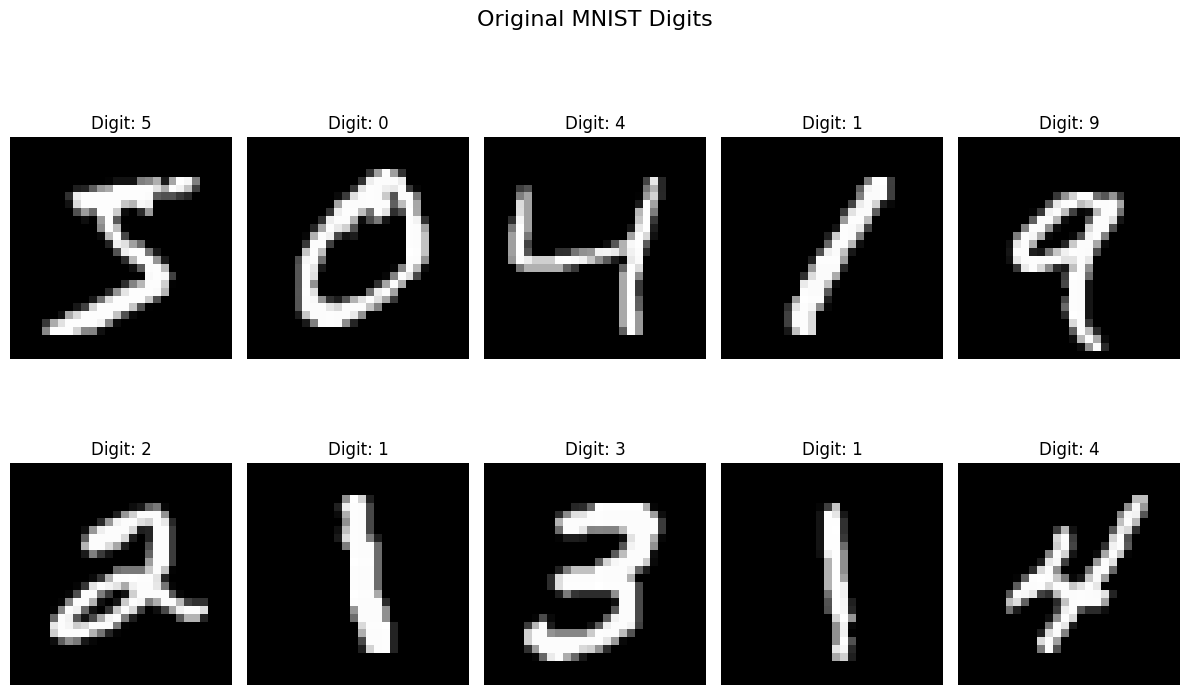

Applying PCA with different numbers of components...
Processing with 10 components...
  - Explained variance: 49.43%
  - Compression ratio: 98.72%
Processing with 50 components...
  - Explained variance: 82.83%
  - Compression ratio: 93.62%
Processing with 100 components...
  - Explained variance: 91.69%
  - Compression ratio: 87.24%
Processing with 200 components...
  - Explained variance: 96.78%
  - Compression ratio: 74.49%
Processing with 400 components...
  - Explained variance: 99.62%
  - Compression ratio: 48.98%
PCA compression completed.

Reconstruction comparison for digit 5 (sample 0):


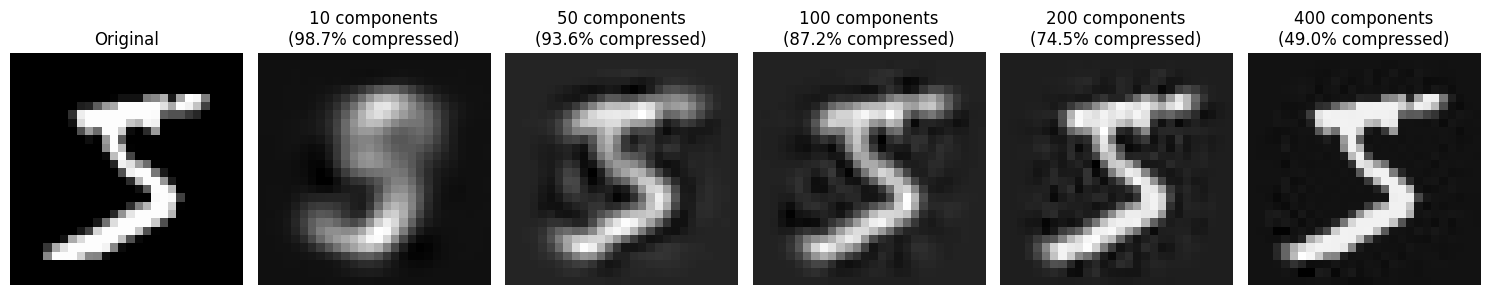


Reconstruction comparison for digit 5 (sample 100):


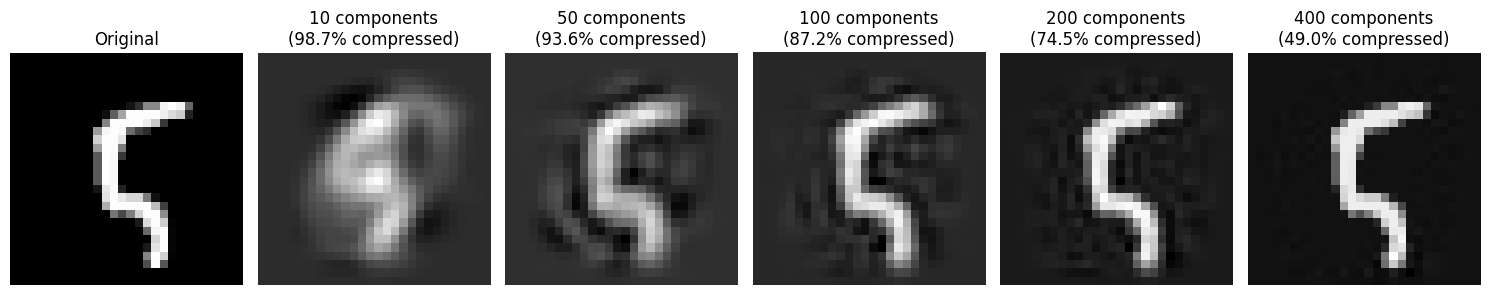


Reconstruction comparison for digit 3 (sample 500):


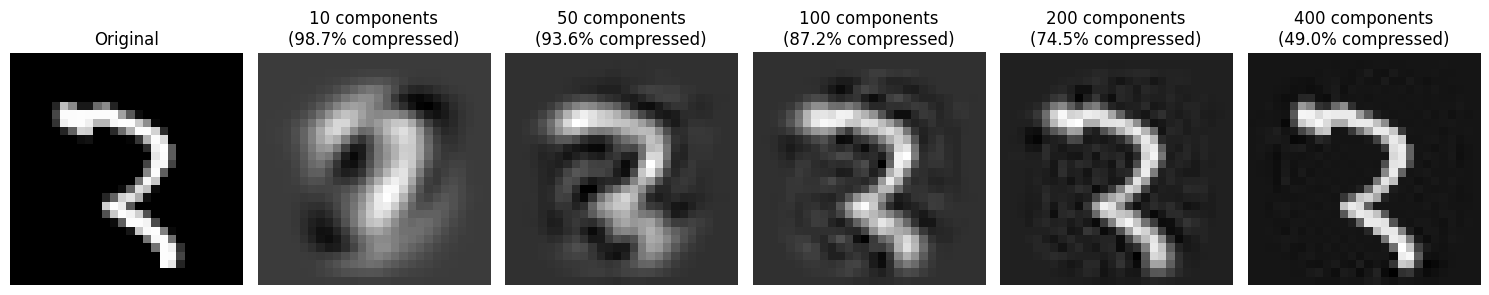


Reconstruction comparison for digit 0 (sample 1000):


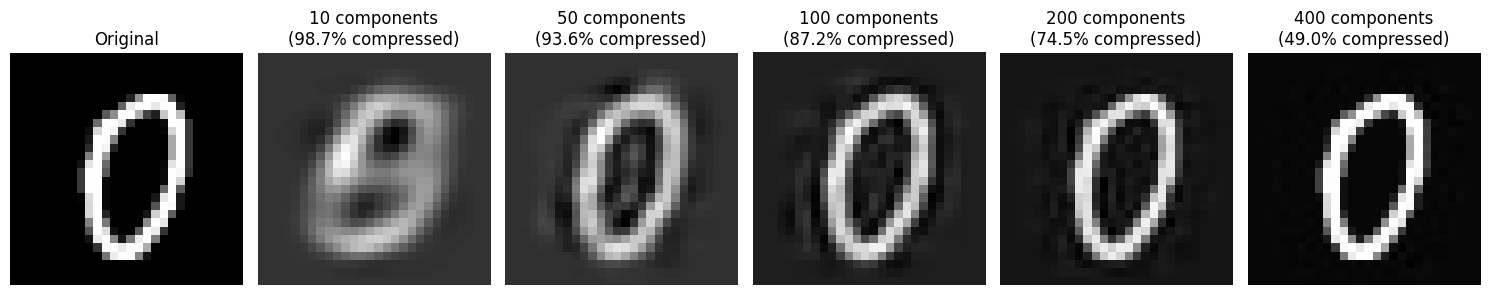


Reconstruction comparison for digit 5 (sample 2000):


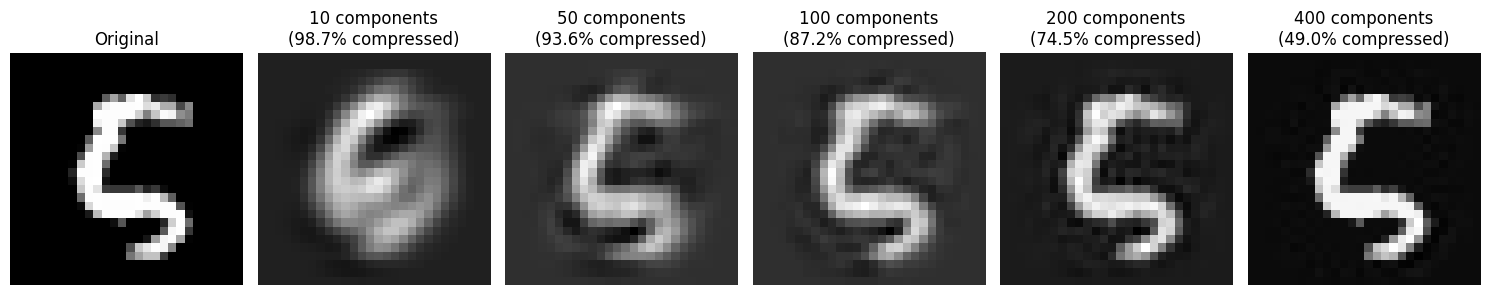

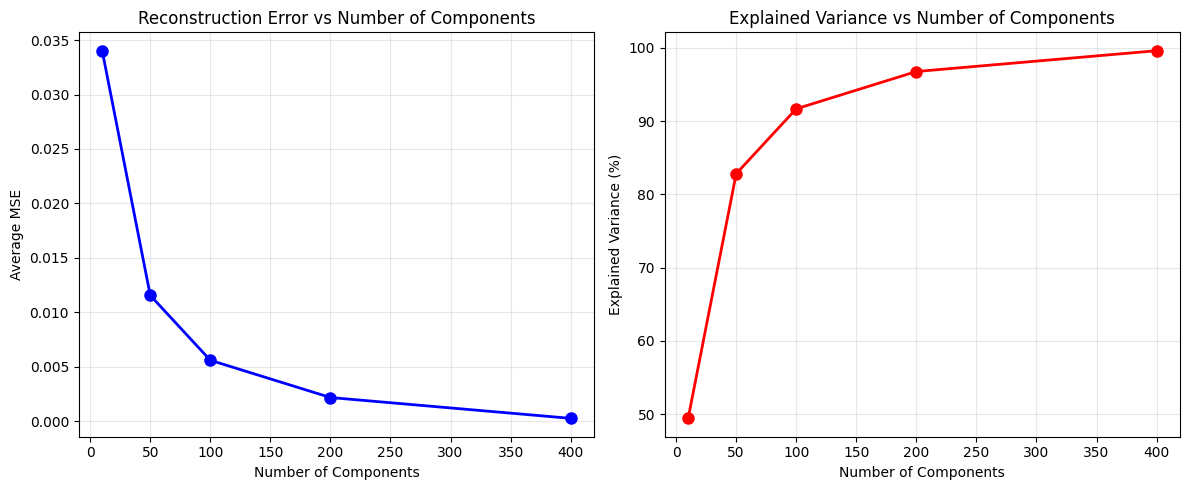


Comprehensive Comparison Matrix:


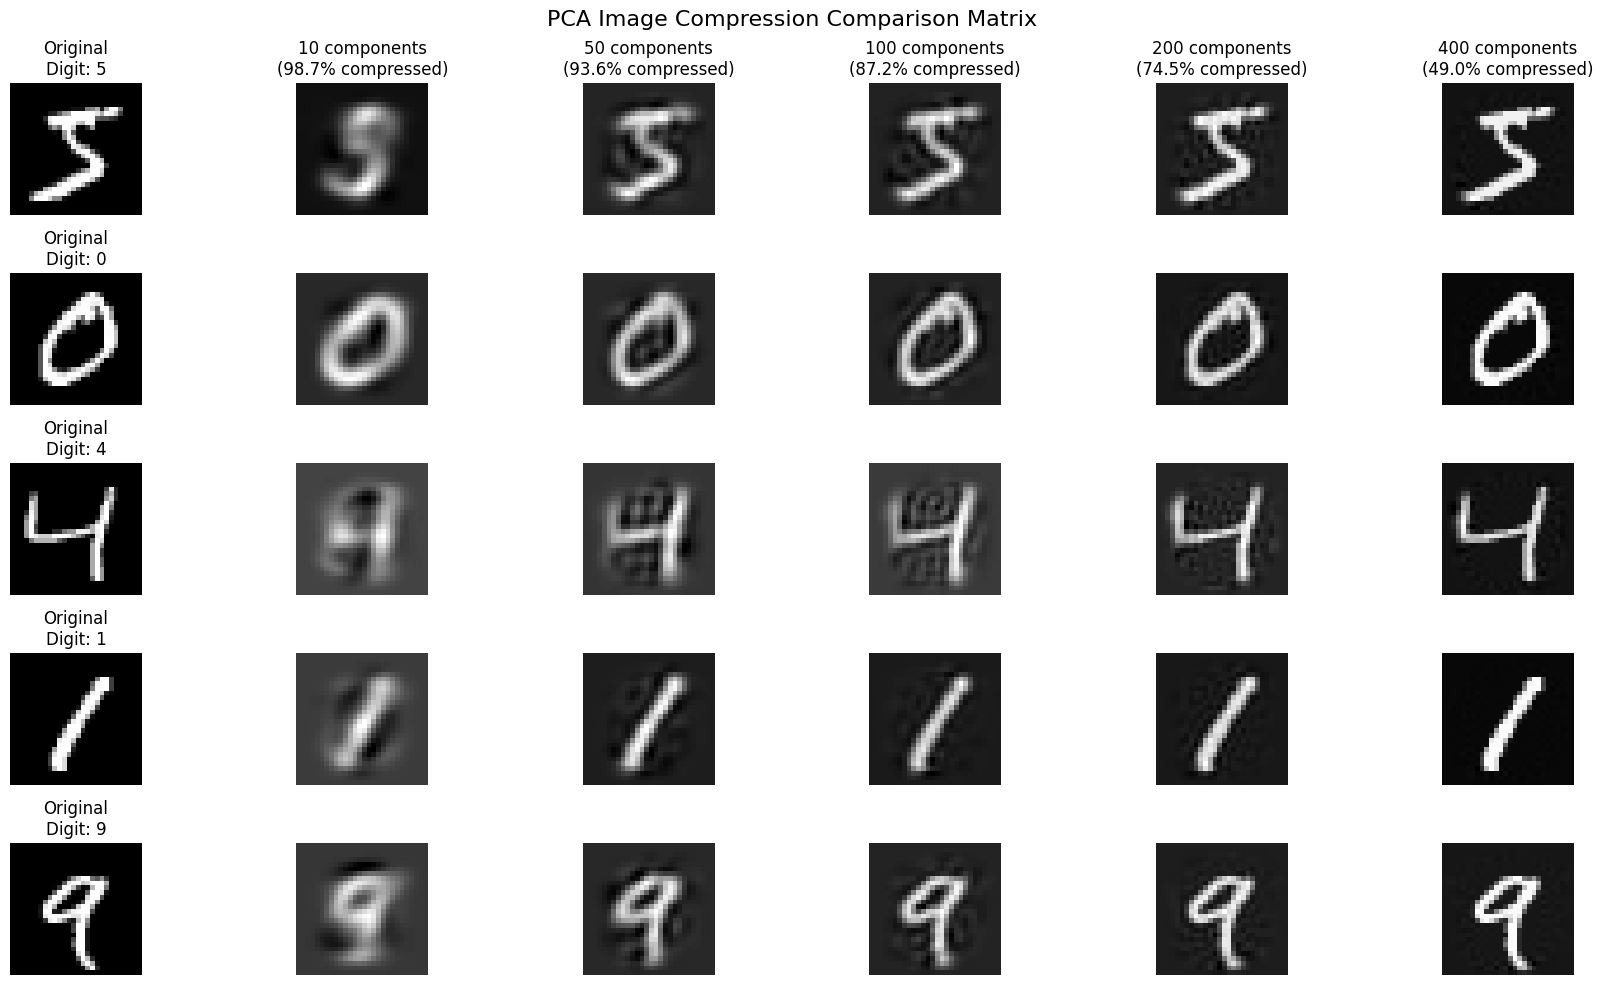


PCA Image Compression Analysis Summary:

Original image dimensions: (28, 28) = 784 pixels
Number of samples analyzed: 10000

Compression Results:
Components:  10 | Compression:  98.7% | Variance Explained:  49.4% | Avg MSE: 0.034024
Components:  50 | Compression:  93.6% | Variance Explained:  82.8% | Avg MSE: 0.011556
Components: 100 | Compression:  87.2% | Variance Explained:  91.7% | Avg MSE: 0.005594
Components: 200 | Compression:  74.5% | Variance Explained:  96.8% | Avg MSE: 0.002170
Components: 400 | Compression:  49.0% | Variance Explained:  99.6% | Avg MSE: 0.000258


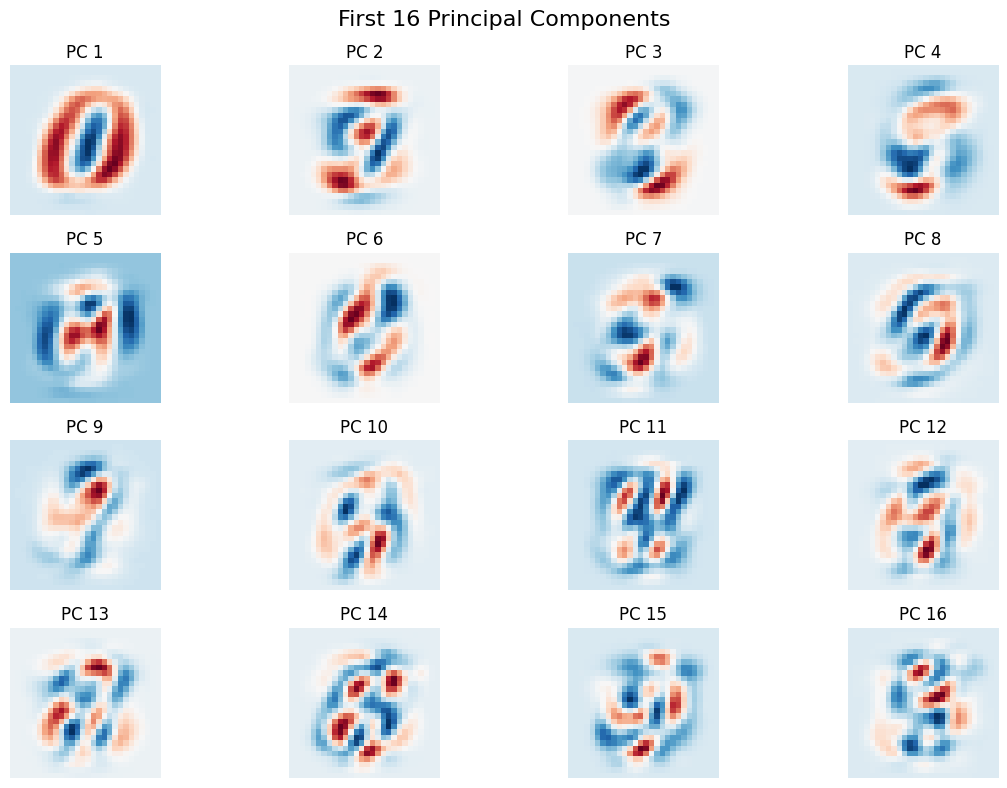

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_data = mnist.data.astype('uint8')
y_data = mnist.target.astype('int')
X_train = X_data[:60000].reshape(-1, 28, 28)
y_train = y_data[:60000]
X_test = X_data[60000:].reshape(-1, 28, 28)
y_test = y_data[60000:]
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Pixel value range: {X_train.min()} to {X_train.max()}")
n_samples = 10000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]
print(f"\nWorking with {n_samples} samples.")
original_shape = X_subset.shape[1:]  
X_reshaped = X_subset.reshape(X_subset.shape[0], -1)  
print(f"Reshaped data: {X_reshaped.shape}")
X_normalized = X_reshaped.astype('float32') / 255.0
print("Data preprocessing completed.")
plt.figure(figsize=(12, 8))
plt.suptitle("Original MNIST Digits", fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_subset[i], cmap='gray')
    plt.title(f'Digit: {y_subset[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
def apply_pca_compression(data, n_components):
    pca = PCA(n_components=n_components)    
    compressed_data = pca.fit_transform(data)    
    reconstructed_data = pca.inverse_transform(compressed_data)
    return reconstructed_data, pca, pca.explained_variance_ratio_
components_to_test = [10, 50, 100, 200, 400]
reconstructions = {}
explained_variances = {}
print("Applying PCA with different numbers of components...")
for n_comp in components_to_test:
    print(f"Processing with {n_comp} components...")
    reconstructed, pca_model, exp_var = apply_pca_compression(X_normalized, n_comp)
    reconstructions[n_comp] = reconstructed
    explained_variances[n_comp] = exp_var
    total_variance = np.sum(exp_var) * 100
    compression_ratio = (784 - n_comp) / 784 * 100
    print(f"  - Explained variance: {total_variance:.2f}%")
    print(f"  - Compression ratio: {compression_ratio:.2f}%")
print("PCA compression completed.")
def plot_reconstruction_comparison(original_data, reconstructions_dict, sample_idx=0):
    n_components = len(reconstructions_dict)
    plt.figure(figsize=(15, 3))    
    plt.subplot(1, n_components + 1, 1)
    original_img = original_data[sample_idx].reshape(original_shape)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original')
    plt.axis('off')    
    for i, (n_comp, reconstructed) in enumerate(reconstructions_dict.items()):
        plt.subplot(1, n_components + 1, i + 2)
        reconstructed_img = reconstructed[sample_idx].reshape(original_shape)
        plt.imshow(reconstructed_img, cmap='gray')        
        compression_ratio = (784 - n_comp) / 784 * 100
        plt.title(f'{n_comp} components\n({compression_ratio:.1f}% compressed)')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
sample_indices = [0, 100, 500, 1000, 2000] 
for idx in sample_indices:
    digit_label = y_subset[idx]
    print(f"\nReconstruction comparison for digit {digit_label} (sample {idx}):")
    plot_reconstruction_comparison(X_normalized, reconstructions, idx)
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2, axis=1)
mse_results = {}
for n_comp, reconstructed in reconstructions.items():
    mse = calculate_mse(X_normalized, reconstructed)
    mse_results[n_comp] = mse
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
avg_mse = [np.mean(mse_results[n_comp]) for n_comp in components_to_test]
plt.plot(components_to_test, avg_mse, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Average MSE')
plt.title('Reconstruction Error vs Number of Components')
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
explained_var_total = [np.sum(explained_variances[n_comp]) * 100 for n_comp in components_to_test]
plt.plot(components_to_test, explained_var_total, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance vs Number of Components')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
def create_comparison_matrix(original_data, reconstructions_dict, n_samples=5):
    n_components = len(reconstructions_dict)
    fig, axes = plt.subplots(n_samples, n_components + 1, figsize=(18, 10))    
    for sample_idx in range(n_samples):
        axes[sample_idx, 0].imshow(original_data[sample_idx].reshape(original_shape), cmap='gray')
        axes[sample_idx, 0].set_title(f'Original\nDigit: {y_subset[sample_idx]}')
        axes[sample_idx, 0].axis('off')
        for col_idx, (n_comp, reconstructed) in enumerate(reconstructions_dict.items()):
            reconstructed_img = reconstructed[sample_idx].reshape(original_shape)
            axes[sample_idx, col_idx + 1].imshow(reconstructed_img, cmap='gray')
            if sample_idx == 0: 
                compression_ratio = (784 - n_comp) / 784 * 100
                axes[sample_idx, col_idx + 1].set_title(f'{n_comp} components\n({compression_ratio:.1f}% compressed)')
            axes[sample_idx, col_idx + 1].axis('off')
    plt.suptitle('PCA Image Compression Comparison Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()
print("\nComprehensive Comparison Matrix:")
create_comparison_matrix(X_normalized, reconstructions)
print("\nPCA Image Compression Analysis Summary:\n")
print(f"Original image dimensions: {original_shape} = {np.prod(original_shape)} pixels")
print(f"Number of samples analyzed: {n_samples}")
print("\nCompression Results:")
for n_comp in components_to_test:
    compression_ratio = (784 - n_comp) / 784 * 100
    explained_var = np.sum(explained_variances[n_comp]) * 100
    avg_mse = np.mean(mse_results[n_comp])
    print(f"Components: {n_comp:3d} | Compression: {compression_ratio:5.1f}% | "
          f"Variance Explained: {explained_var:5.1f}% | Avg MSE: {avg_mse:.6f}")
pca_viz = PCA(n_components=16)
pca_viz.fit(X_normalized)
plt.figure(figsize=(12, 8))
plt.suptitle("First 16 Principal Components", fontsize=16)
for i in range(16):
    plt.subplot(4, 4, i+1)
    component = pca_viz.components_[i].reshape(original_shape)
    plt.imshow(component, cmap='RdBu_r') 
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()